In [ ]:
# Install required libraries (some may already be included)
!pip install matplotlib numpy scipy tqdm

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tqdm import tqdm

# Enable better plot quality in Colab
%config InlineBackend.figure_format = 'retina'

#environment is ready

In [ ]:
def double_pendulum(t, state, m1, m2, L1, L2, g=9.81):
    θ1, ω1, θ2, ω2 = state

    Δ = θ2 - θ1

    den = m1 + m2 * np.sin(Δ)**2
    denom1 = L1 * den
    denom2 = L2 * den

    dω1 = (
        m2 * L1 * ω1**2 * np.sin(Δ) * np.cos(Δ)
        + m2 * g * np.sin(θ2) * np.cos(Δ)
        + m2 * L2 * ω2**2 * np.sin(Δ)
        - (m1 + m2) * g * np.sin(θ1)
    ) / denom1

    dω2 = (
        -m2 * L2 * ω2**2 * np.sin(Δ) * np.cos(Δ)
        + (m1 + m2) * (g*np.sin(θ1)*np.cos(Δ) - L1 * ω1**2 * np.sin(Δ) - g*np.sin(θ2))
    ) / denom2

    return [ω1, dω1, ω2, dω2]


In [ ]:
# Time span
t_max = 30
t_eval = np.linspace(0, t_max, 5000)

# Initial conditions
θ1_0 = np.radians(1.0472)
ω1_0 = 0
θ2_0 = np.radians(-10)
ω2_0 = 0

initial_state = [θ1_0, ω1_0, θ2_0, ω2_0]

# Parameters
m1 = 1
m2 = 1
L1 = 1
L2 = 1

# Solve ODE
sol = solve_ivp(
    fun=lambda t, y: double_pendulum(t, y, m1, m2, L1, L2),
    t_span=(0, t_max),
    y0=initial_state,
    t_eval=t_eval,
    atol=1e-10,
    rtol=1e-10,
    max_step=0.02
)

θ1, ω1, θ2, ω2 = sol.y

# single simulation completed, data stored.

In [ ]:
#Second simulation with slightly different initial conditions

θ1_0_b = np.radians(1.0572)
ω1_0_b = 0
θ2_0_b = θ2_0
ω2_0_b = 0

initial_state_b = [θ1_0_b, ω1_0_b, θ2_0_b, ω2_0_b]

sol_b = solve_ivp(
    fun=lambda t, y: double_pendulum(t, y, m1, m2, L1, L2),
    t_span=(0, t_max),
    y0=initial_state_b,
    t_eval=t_eval,
    atol=1e-10,
    rtol=1e-10,
    max_step=0.02
)

θ1_b, ω1_b, θ2_b, ω2_b = sol_b.y


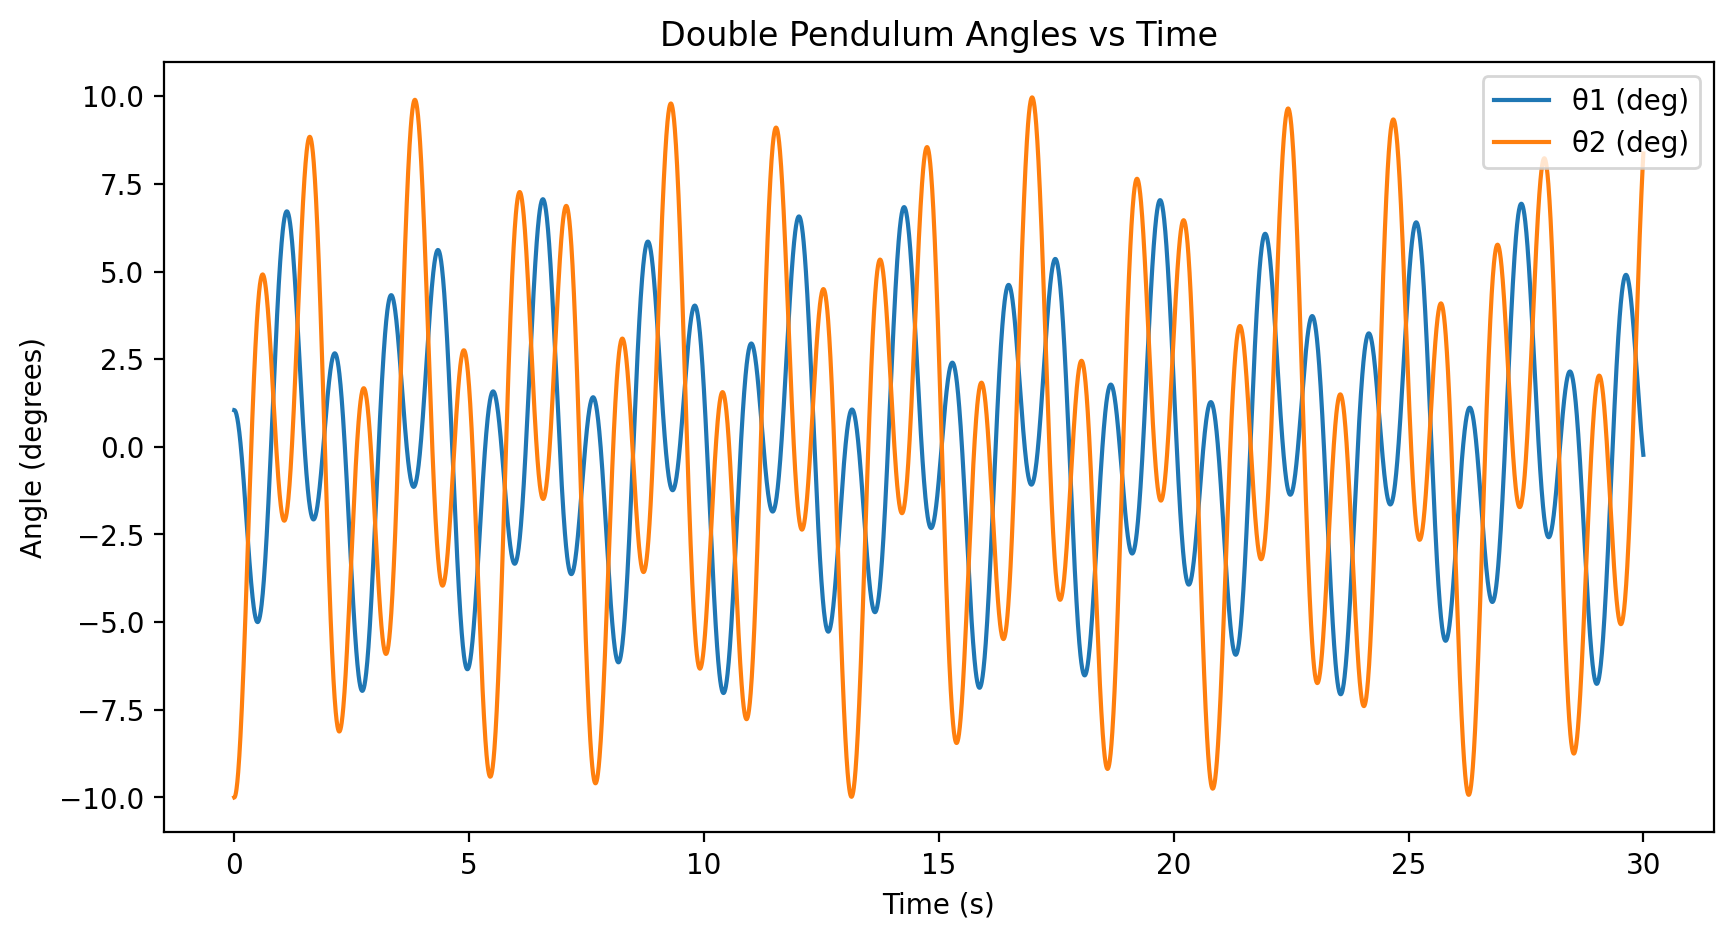

In [ ]:
#make the a graph of angle vs time for both pendulums on starting condistions
plt.figure(figsize=(10,5))

plt.plot(sol.t, np.degrees(θ1), label="θ1 (deg)")
plt.plot(sol.t, np.degrees(θ2), label="θ2 (deg)")
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.title("Double Pendulum Angles vs Time")
plt.legend()
plt.show()

In [ ]:
# Convert angles to (x, y) coordinates
x1 = L1 * np.sin(θ1)
y1 = -L1 * np.cos(θ1)

x2 = x1 + L2 * np.sin(θ2)
y2 = y1 - L2 * np.cos(θ2)

### FIXED BLOCK — avoids printing 5000 values
print("Coordinates loaded. Example:")
print(x1[0], y1[0], x2[0], y2[0])


Coordinates loaded. Example:
0.018276070361091433 -0.9998329786780172 -0.1553721073058389 -1.9846407316902253


In [ ]:
#Coordinates for second simulation
x1_b = L1 * np.sin(θ1_b)
y1_b = -L1 * np.cos(θ1_b)

x2_b = x1_b + L2 * np.sin(θ2_b)
y2_b = y1_b - L2 * np.cos(θ2_b)

print(x1_b[0], y1_b[0], x2_b[0], y2_b[0])


0.018450573856324554 -0.9998297736736851 -0.15519760381060577 -1.984637526685893


In [ ]:
from matplotlib import animation
from IPython.display import HTML

plt.rcParams['animation.embed_limit'] = 2**128

# Create figure

# Pick fewer frames for animation
frame_indices = np.linspace(0, len(sol.t)-1, 1000, dtype=int)

# Create figure
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)
ax.set_aspect('equal')
line1, = ax.plot([], [], 'o-', lw=2, color="blue")   # first pendulum
line2, = ax.plot([], [], 'o-', lw=2, color="red")    # second pendulum

# Add text object for seconds counter
time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes,
                    fontsize=12, verticalalignment='top')

# Initialization function
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    time_text.set_text('')
    return (line1, line2, time_text)

# Animation function
def animate(i):
    idx = frame_indices[i]

    # First pendulum
    line1.set_data([0, x1[idx], x2[idx]], [0, y1[idx], y2[idx]])

    # Second pendulum
    line2.set_data([0, x1_b[idx], x2_b[idx]], [0, y1_b[idx], y2_b[idx]])

    # Clock
    time_text.set_text(f"t = {sol.t[idx]:.2f} s")

    return (line1, line2, time_text)


# Create animation
anim1 = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(frame_indices), interval=50, blit=True
)

# Display animation in Colab
HTML(anim1.to_jshtml())

# Save as GIF
anim1.save("double_pendulum60.gif", writer='pillow', fps=30)



In [ ]:
from google.colab import files
files.download("double_pendulum120.120..gif")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
angular_separation_1 = np.abs(θ1 - θ1_b)
angular_separation_2 = np.abs(θ2 - θ2_b)

print("Angular separation for theta1 (first 5 values):")
print(angular_separation_1[:5])
print("\nAngular separation for theta2 (first 5 values):")
print(angular_separation_2[:5])

Angular separation for theta1 (first 5 values):
[0.00017453 0.00017454 0.00017454 0.00017456 0.00017457]

Angular separation for theta2 (first 5 values):
[0.00000000e+00 2.25263313e-08 9.01311149e-08 2.02891631e-07
 3.60936397e-07]


In [ ]:
euclidean_distance = np.sqrt((x2 - x2_b)**2 + (y2 - y2_b)**2)

print("Euclidean distance (first 5 values):")
print(euclidean_distance[:5])

Euclidean distance (first 5 values):
[0.00017453 0.00017455 0.0001746  0.00017469 0.0001748 ]


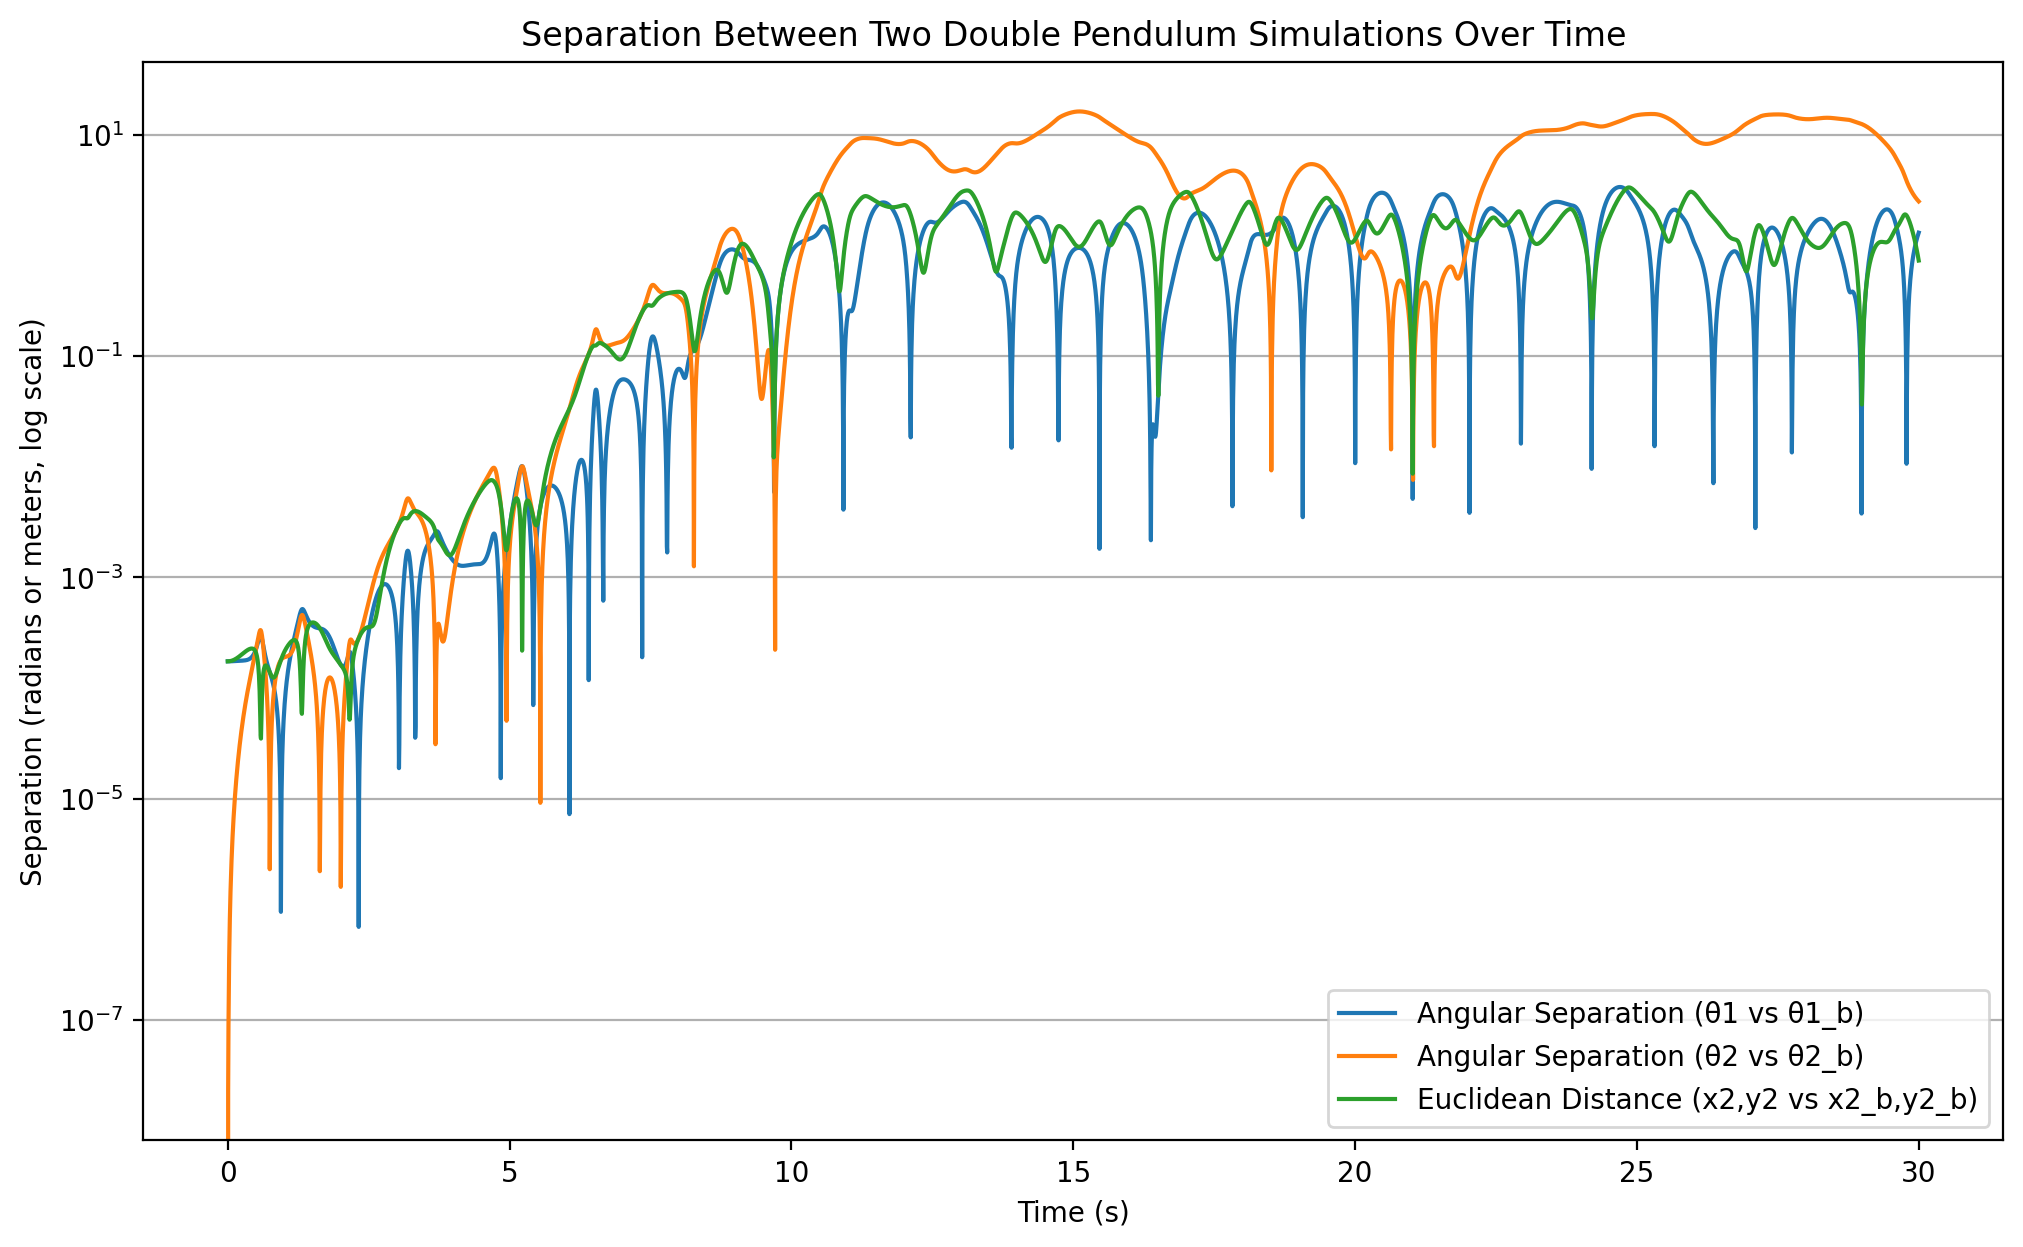

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(t_eval, angular_separation_1, label='Angular Separation (θ1 vs θ1_b)')
plt.plot(t_eval, angular_separation_2, label='Angular Separation (θ2 vs θ2_b)')
plt.plot(t_eval, euclidean_distance, label='Euclidean Distance (x2,y2 vs x2_b,y2_b)')

plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Separation (radians or meters, log scale)')
plt.title('Separation Between Two Double Pendulum Simulations Over Time')
plt.legend()
plt.grid(True, which="both", ls="-", axis='y')
plt.show()

In [ ]:
t_start = 0
t_end = 30

# Find the indices corresponding to the selected time interval
idx_start = np.argmin(np.abs(t_eval - t_start))
idx_end = np.argmin(np.abs(t_eval - t_end))

t_exponential = t_eval[idx_start:idx_end]
euclidean_distance_exponential = euclidean_distance[idx_start:idx_end]

print(f"Selected time interval: {t_exponential[0]:.2f}s to {t_exponential[-1]:.2f}s")
print(f"Number of data points in the selected interval: {len(t_exponential)}")

Selected time interval: 0.00s to 29.99s
Number of data points in the selected interval: 4999


In [ ]:
log_separation = np.log(euclidean_distance_exponential)

print("Log-transformed separation (first 5 values):")
print(log_separation[:5])

Log-transformed separation (first 5 values):
[-8.65339715 -8.6533     -8.65300864 -8.65252331 -8.65184443]


In [ ]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(t_exponential, log_separation)

lyapunov_exponent = slope

print(f"Calculated Lyapunov Exponent (slope of log-linear regression): {lyapunov_exponent:.6f}")

Calculated Lyapunov Exponent (slope of log-linear regression): 0.255996


In [ ]:
# Define measurement/rounding precision and tolerance
delta_0 = 1.7*1e-3  # Initial precision (e.g., small initial difference)
delta_tol = 0.1  # Tolerance (e.g., when trajectories differ by 0.1 rad)

# Calculate Lyapunov time (T_L)
T_L = 1 / lyapunov_exponent

# Calculate predictability time (T_pred)
T_pred = (1 / lyapunov_exponent) * np.log(delta_tol / delta_0)

print(f"Lyapunov Exponent (λ): {lyapunov_exponent:.4f} 1/s")
print(f"Lyapunov Time (T_L): {T_L:.4f} s")
print(f"Predictability Time (T_pred) for δ_0={delta_0} and δ_tol={delta_tol}: {T_pred:.4f} s")

Lyapunov Exponent (λ): 0.2560 1/s
Lyapunov Time (T_L): 3.9063 s
Predictability Time (T_pred) for δ_0=0.0017 and δ_tol=0.1: 15.9164 s
